<a href="https://colab.research.google.com/github/shreya24292/Sales_prediction_analysis/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload Dataset

In [25]:
from google.colab import files
uploaded = files.upload()


Saving Advertising (1).csv to Advertising (1) (1).csv


# Import Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

#Load Dataset

In [27]:
df = pd.read_csv('Advertising (1).csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [28]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Data Cleaning

Remove null values

In [29]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


Drop duplicates values

In [30]:
df.fillna(df.mean(),inplace = True)
df.drop_duplicates(inplace = False)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Scatter plot

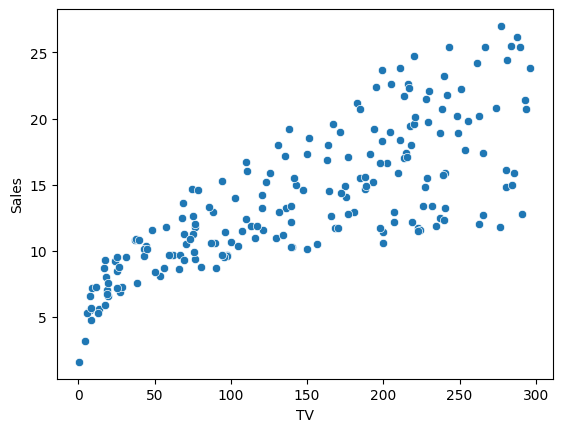

In [31]:
import matplotlib.pyplot as plt
sns.scatterplot(x='TV', y='Sales', data=df)
plt.show()

# Split Data

Separating features & targets

In [32]:
from sklearn.model_selection import train_test_split
X = df.drop('Sales' , axis = 1)
Y = df['Sales']

X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 100)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Apply linear regression

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , Y_train)
y_pred = model.predict(X_test)

# Evaluate Model

In [35]:
from sklearn.metrics import r2_score , mean_absolute_error
print("R2 Score:",r2_score(Y_test,y_pred))
print("MAE:",mean_absolute_error(Y_test,y_pred))

R2 Score: 0.9184136004105717
MAE: 1.029124930516935


# Check feature importance

In [14]:
coeff = pd.DataFrame(model.coef_, X.columns, columns=['Impact'])
print(coeff.sort_values(by='Impact', ascending=False))


              Impact
Radio       0.185625
TV          0.045598
Newspaper   0.002083
Unnamed: 0 -0.000520


# Training dataset using linear reg and train_test_split func

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Scatterplot for each quantity with regression line

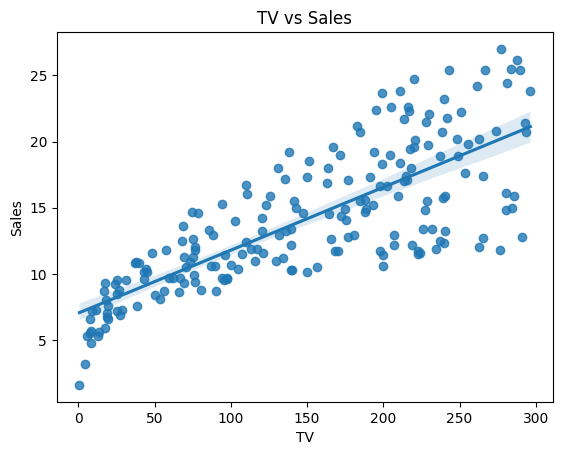

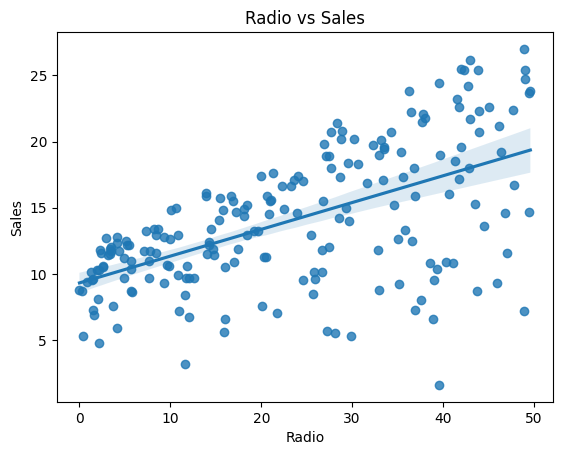

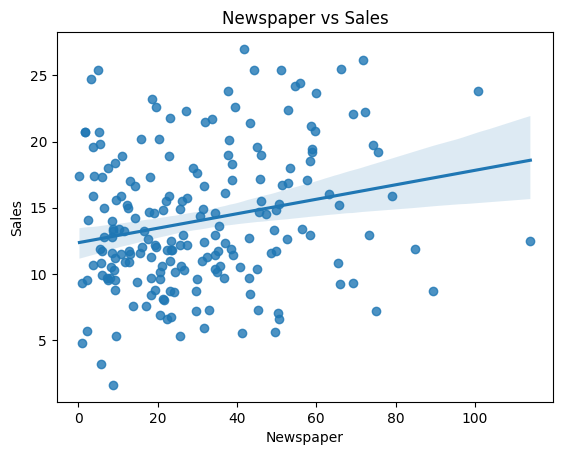

In [23]:
sns.regplot(x='TV', y='Sales', data=df)
plt.title("TV vs Sales")
plt.show()

sns.regplot(x='Radio', y='Sales', data=df)
plt.title("Radio vs Sales")
plt.show()

sns.regplot(x='Newspaper', y='Sales', data=df)
plt.title("Newspaper vs Sales")
plt.show()

# Scatter plot graph of Actual VS predicted value

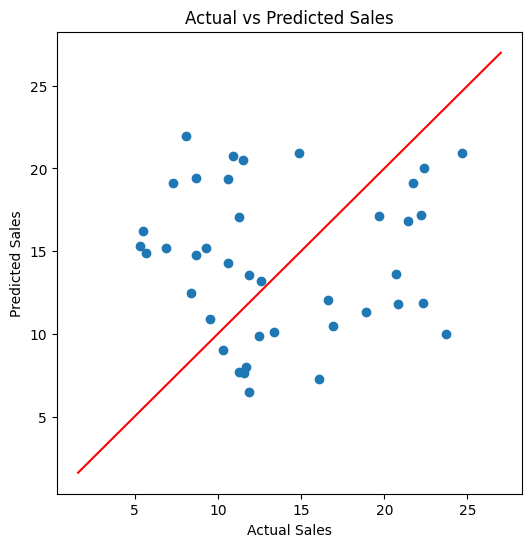

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")

# Perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')

plt.show()